In [1]:
import Utils
import vgg
import numpy as np
import matplotlib.pyplot as plt
import os
from torch import optim, mean

In [2]:
path = os.getcwd()+'/images'
print(os.listdir(path))

['tsa17.jpg', 'me1.jpg', 'me2.jpg', 'strips.jpg', 'paint.jpg', '004.jpg', 'brunobig_painting.jpg', '003.jpg']


In [3]:
content_image = Utils.openImage(path+'/004.jpg', shape = (1024,576))
style_image = Utils.openImage(path+'/paint.jpg', shape = (1024,576))

In [4]:
content_representation = vgg.getFeatures(content_image)

In [5]:
style_features = vgg.getFeatures(style_image)

In [6]:
style_representation = {layer: vgg.grammatrix(style_features[layer]) for layer in style_features}

In [7]:
target_image = content_image.clone().requires_grad_(True)

In [8]:
style_weights = {'conv1_1':1.0,
                'conv2_1':1.0,
                'conv3_1':0.8,
                'conv4_1':0.3,
                'conv5_1':0.1
                }
alpha = 1
beta = 1e12

In [9]:
optimizer = optim.Adam([target_image], lr = 0.005)

loss: 68.96743774414062


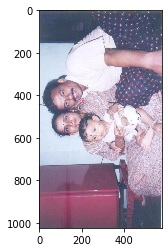

loss: 12.396276473999023


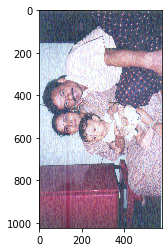

In [ ]:
epochs = 3000
for epoch in range(epochs):
    target_features = vgg.getFeatures(target_image)
    content_loss = mean((target_features['conv4_2'] - content_representation['conv4_2'])**2)
    style_loss = 0.0
    for layer in style_weights:
        target_feature = target_features[layer]
        _, d, h, w = target_feature.shape
        layer_style_loss = style_weights[layer] * mean((vgg.grammatrix(target_feature) - style_representation[layer])**2)
        style_loss += layer_style_loss/(d*h*w)
    total_loss = alpha*content_loss + beta*style_loss
    
    optimizer.zero_grad()
    total_loss.backward(retain_graph = True)
    optimizer.step()
    if epoch%100 == 0:
        print('loss:',total_loss.item())
        plt.imshow(Utils.convertImage(target_image))
        plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
ax1.imshow(Utils.convertImage(content_image))
ax1.axis('off')
ax2.imshow(Utils.convertImage(style_image))
ax2.axis('off')
ax3.imshow(Utils.convertImage(target_image))
ax3.axis('off')